# Task 1: Wine Quality Prediction

#### NISHU MISHRA

### IMPORTING MODULES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df=pd.read_csv('winequality.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Preprocessing the data

In [6]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
# filling the missing values:
for col , value in df.items():
    if col != 'type': # type col -> object datatype
        df[col] = df[col].fillna(df[col].mean())

In [8]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["type"]=le.fit_transform(df["type"])
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


# Exploratory Data Analysis

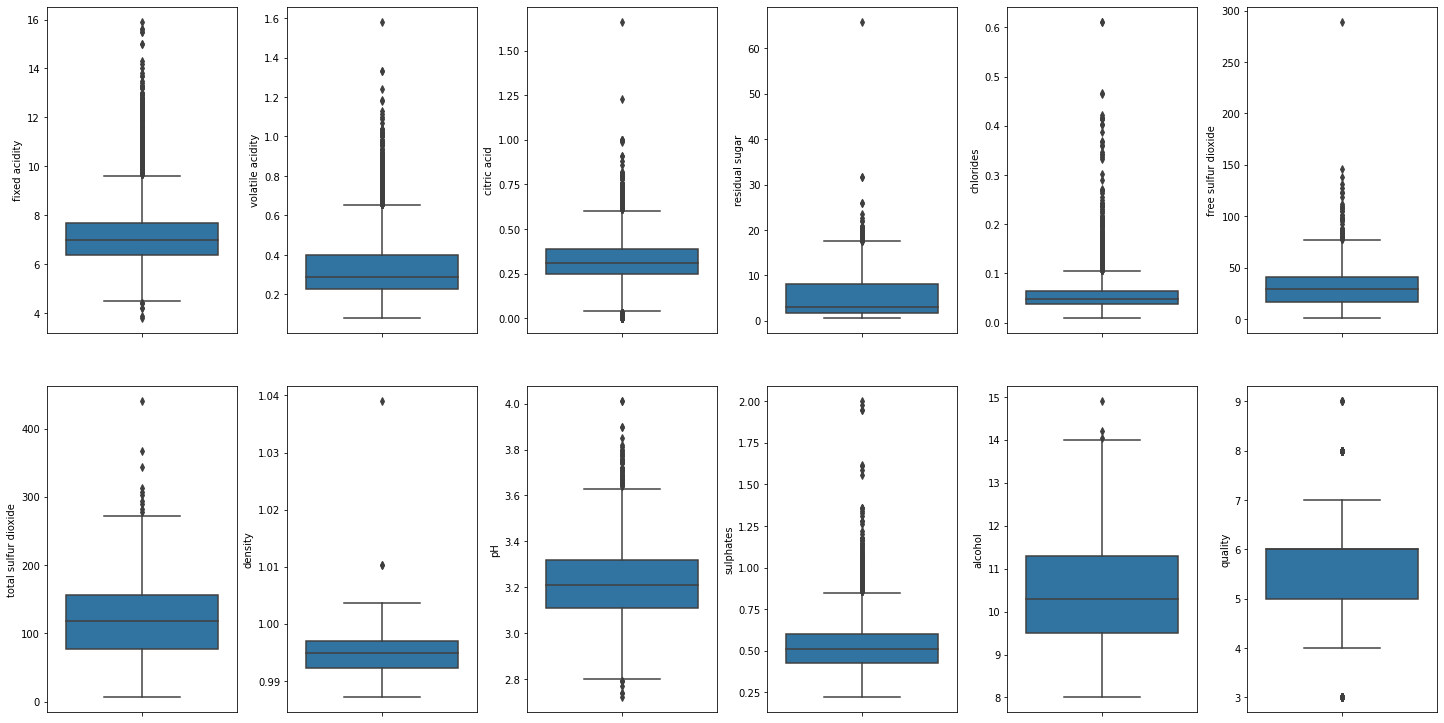

In [10]:
# box plots:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

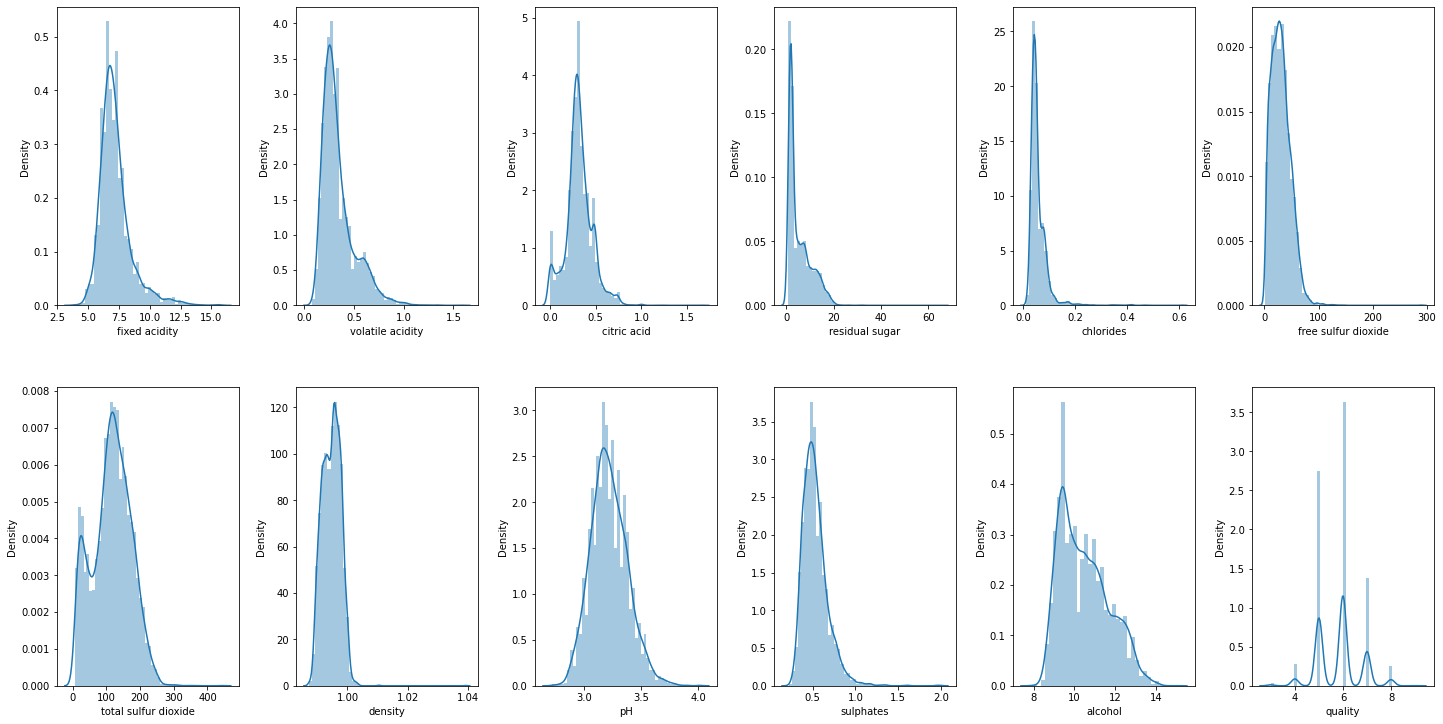

In [11]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

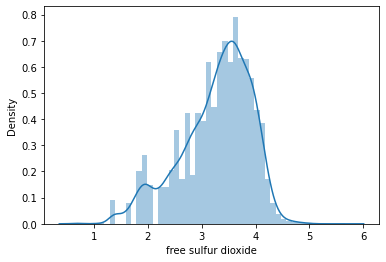

In [12]:
# log transformation:
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

sns.distplot(df['free sulfur dioxide'])

<Axes: xlabel='type', ylabel='count'>

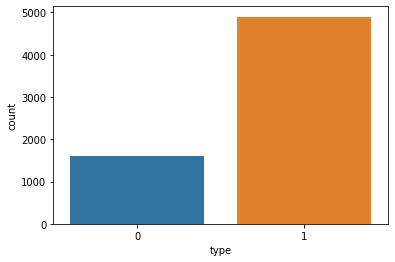

In [13]:
sns.countplot(df['type'])

# Correlation Matrix

In [14]:
corr=df.corr()
print(corr)

                          type  fixed acidity  volatile acidity  citric acid  \
type                  1.000000      -0.486913         -0.652606     0.187073   
fixed acidity        -0.486913       1.000000          0.219918     0.323349   
volatile acidity     -0.652606       0.219918          1.000000    -0.377759   
citric acid           0.187073       0.323349         -0.377759     1.000000   
residual sugar        0.348982      -0.112219         -0.196578     0.142451   
chlorides            -0.512596       0.298282          0.377122     0.039310   
free sulfur dioxide   0.547644      -0.345740         -0.397530     0.118312   
total sulfur dioxide  0.700357      -0.329409         -0.414706     0.195148   
density              -0.390645       0.458941          0.271107     0.096307   
pH                   -0.328514      -0.251683          0.260283    -0.328354   
sulphates            -0.486662       0.300225          0.225313     0.057564   
alcohol               0.032970      -0.0

In [15]:
#heatmap
corr.style.background_gradient(cmap='YlGnBu')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,-0.486913,-0.652606,0.187073,0.348982,-0.512596,0.547644,0.700357,-0.390645,-0.328514,-0.486662,0.032970,0.119323
fixed acidity,-0.486913,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.345740,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,-0.652606,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.397530,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.187073,0.323349,-0.377759,1.000000,0.142451,0.039310,0.118312,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,0.348982,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.394282,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,-0.512596,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.247429,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,0.547644,-0.345740,-0.397530,0.118312,0.394282,-0.247429,1.000000,0.746322,-0.049070,-0.146625,-0.224102,-0.139291,0.112191
total sulfur dioxide,0.700357,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.746322,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,-0.390645,0.458941,0.271107,0.096307,0.552487,0.362580,-0.049070,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.328514,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.146625,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356


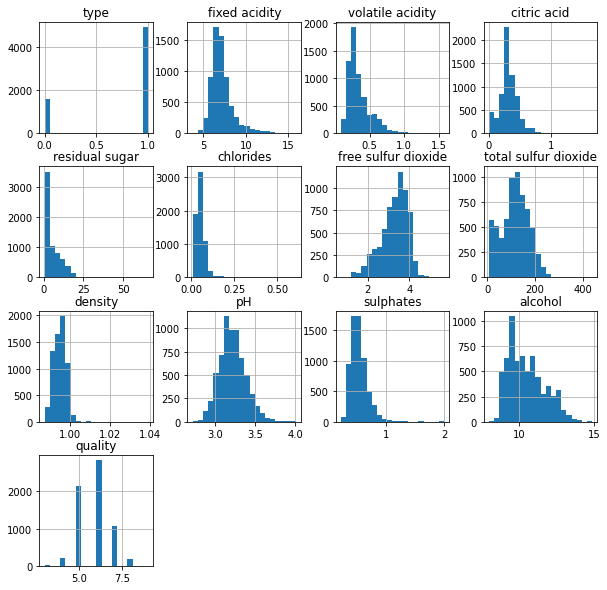

In [16]:
df.hist(bins=20,figsize=(10,10))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


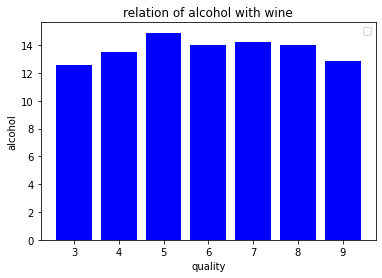

In [17]:
plt.bar(df['quality'], df['alcohol'], color = 'blue')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


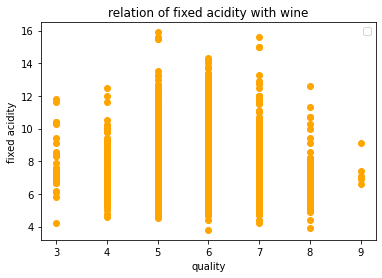

In [18]:
# checking the variation of fixed acidity in the different qualities of wine

plt.scatter(df['quality'], df['fixed acidity'], color = 'orange')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

# Input Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# separate the data and Label
X = df.drop('quality',axis=1)

In [21]:
X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,3.828641,170.0,1.00100,3.00,0.450000,8.8
1,1,6.3,0.300,0.34,1.6,0.049,2.708050,132.0,0.99400,3.30,0.490000,9.5
2,1,8.1,0.280,0.40,6.9,0.050,3.433987,97.0,0.99510,3.26,0.440000,10.1
3,1,7.2,0.230,0.32,8.5,0.058,3.871201,186.0,0.99560,3.19,0.400000,9.9
4,1,7.2,0.230,0.32,8.5,0.058,3.871201,186.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,3.496508,44.0,0.99490,3.45,0.580000,10.5
6493,0,5.9,0.550,0.10,2.2,0.062,3.688879,51.0,0.99512,3.52,0.531215,11.2
6494,0,6.3,0.510,0.13,2.3,0.076,3.401197,40.0,0.99574,3.42,0.750000,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,3.496508,44.0,0.99547,3.57,0.710000,10.2


In [22]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [23]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: quality, Length: 6497, dtype: int64

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=3)

In [25]:
print(Y.shape, Y_train.shape, Y_test.shape)

(6497,) (3898,) (2599,)


## Model Training

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.25, random_state=42)
    model.fit(X_train, Y_train)
    print("Accuracy:", model.score(X_test, Y_test) * 100)

    score = cross_val_score(model, X, Y, cv=5)
    print("CV Score:", np.mean(score)*100)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression()

In [35]:
classify(model, X, Y)

Accuracy: 81.53846153846153
CV Score: 79.9752117013087


## Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, Y)

Accuracy: 83.63076923076923
CV Score: 76.80432285189791


## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, Y)

Accuracy: 88.3076923076923
CV Score: 81.72970924379699


In [40]:
input_data = (11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,13)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine
